In [1]:
# Time Point DEGs + Heatmap of Key Genes

#In this notebook:
#1. We identify differentially expressed genes (DEGs) across regeneration time points.
#2. We visualize a combined heatmap of our genes of interest and top 50 DEGs from time point analysis.

C:\Users\uer\anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\uer\anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\uer\anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\uer\anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
C:\Users\uer\anaconda3\envs\scenv\lib\site-packages\scanpy\tools\_rank_genes_groups.py:482: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


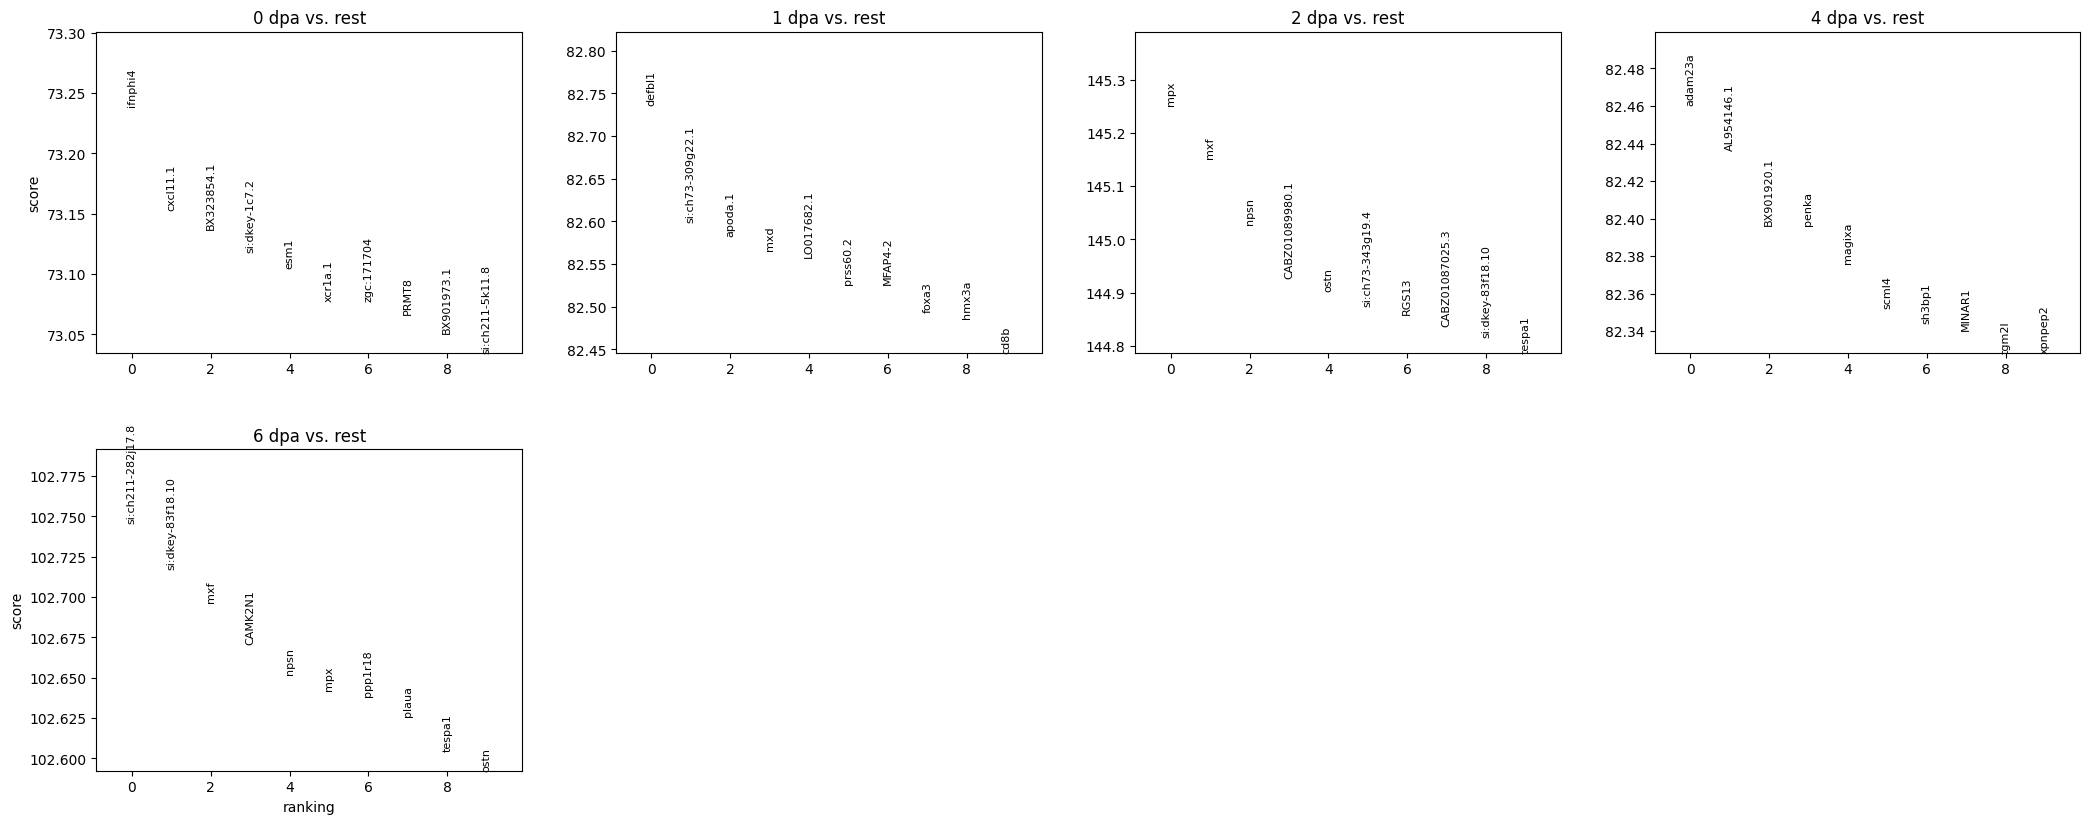

💾 Time point DEG results saved as: differential_expression_timepoints.csv


In [2]:
# =============================================
# 🎯 Zebrafish Fin Regeneration - Time Point Differential Gene Expression (DEG)
# =============================================

import scanpy as sc
import pandas as pd

# Load your merged & clustered dataset
adata = sc.read("merged_regeneration_data_clustered.h5ad")

# Run DEG across time points (change key below as per your dataset)
# ✅ Use correct observation key holding time point info (likely 'time_point_label' or 'time_point_batch')
sc.tl.rank_genes_groups(
    adata,
    groupby='time_point_label',  # You can also try 'time_point_batch' if needed
    method='wilcoxon',
    n_genes=50
)

# Plot top DEGs across time points (optional)
sc.pl.rank_genes_groups(
    adata,
    n_genes=10,
    sharey=False,
    show=True
)

# Save DEG results to CSV
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names

deg_timepoint_df = pd.DataFrame({
    group + '_' + key: result[key][group]
    for group in groups for key in ['names', 'pvals_adj', 'logfoldchanges']
})

deg_timepoint_df.to_csv("differential_expression_timepoints.csv")
print("💾 Time point DEG results saved as: differential_expression_timepoints.csv")


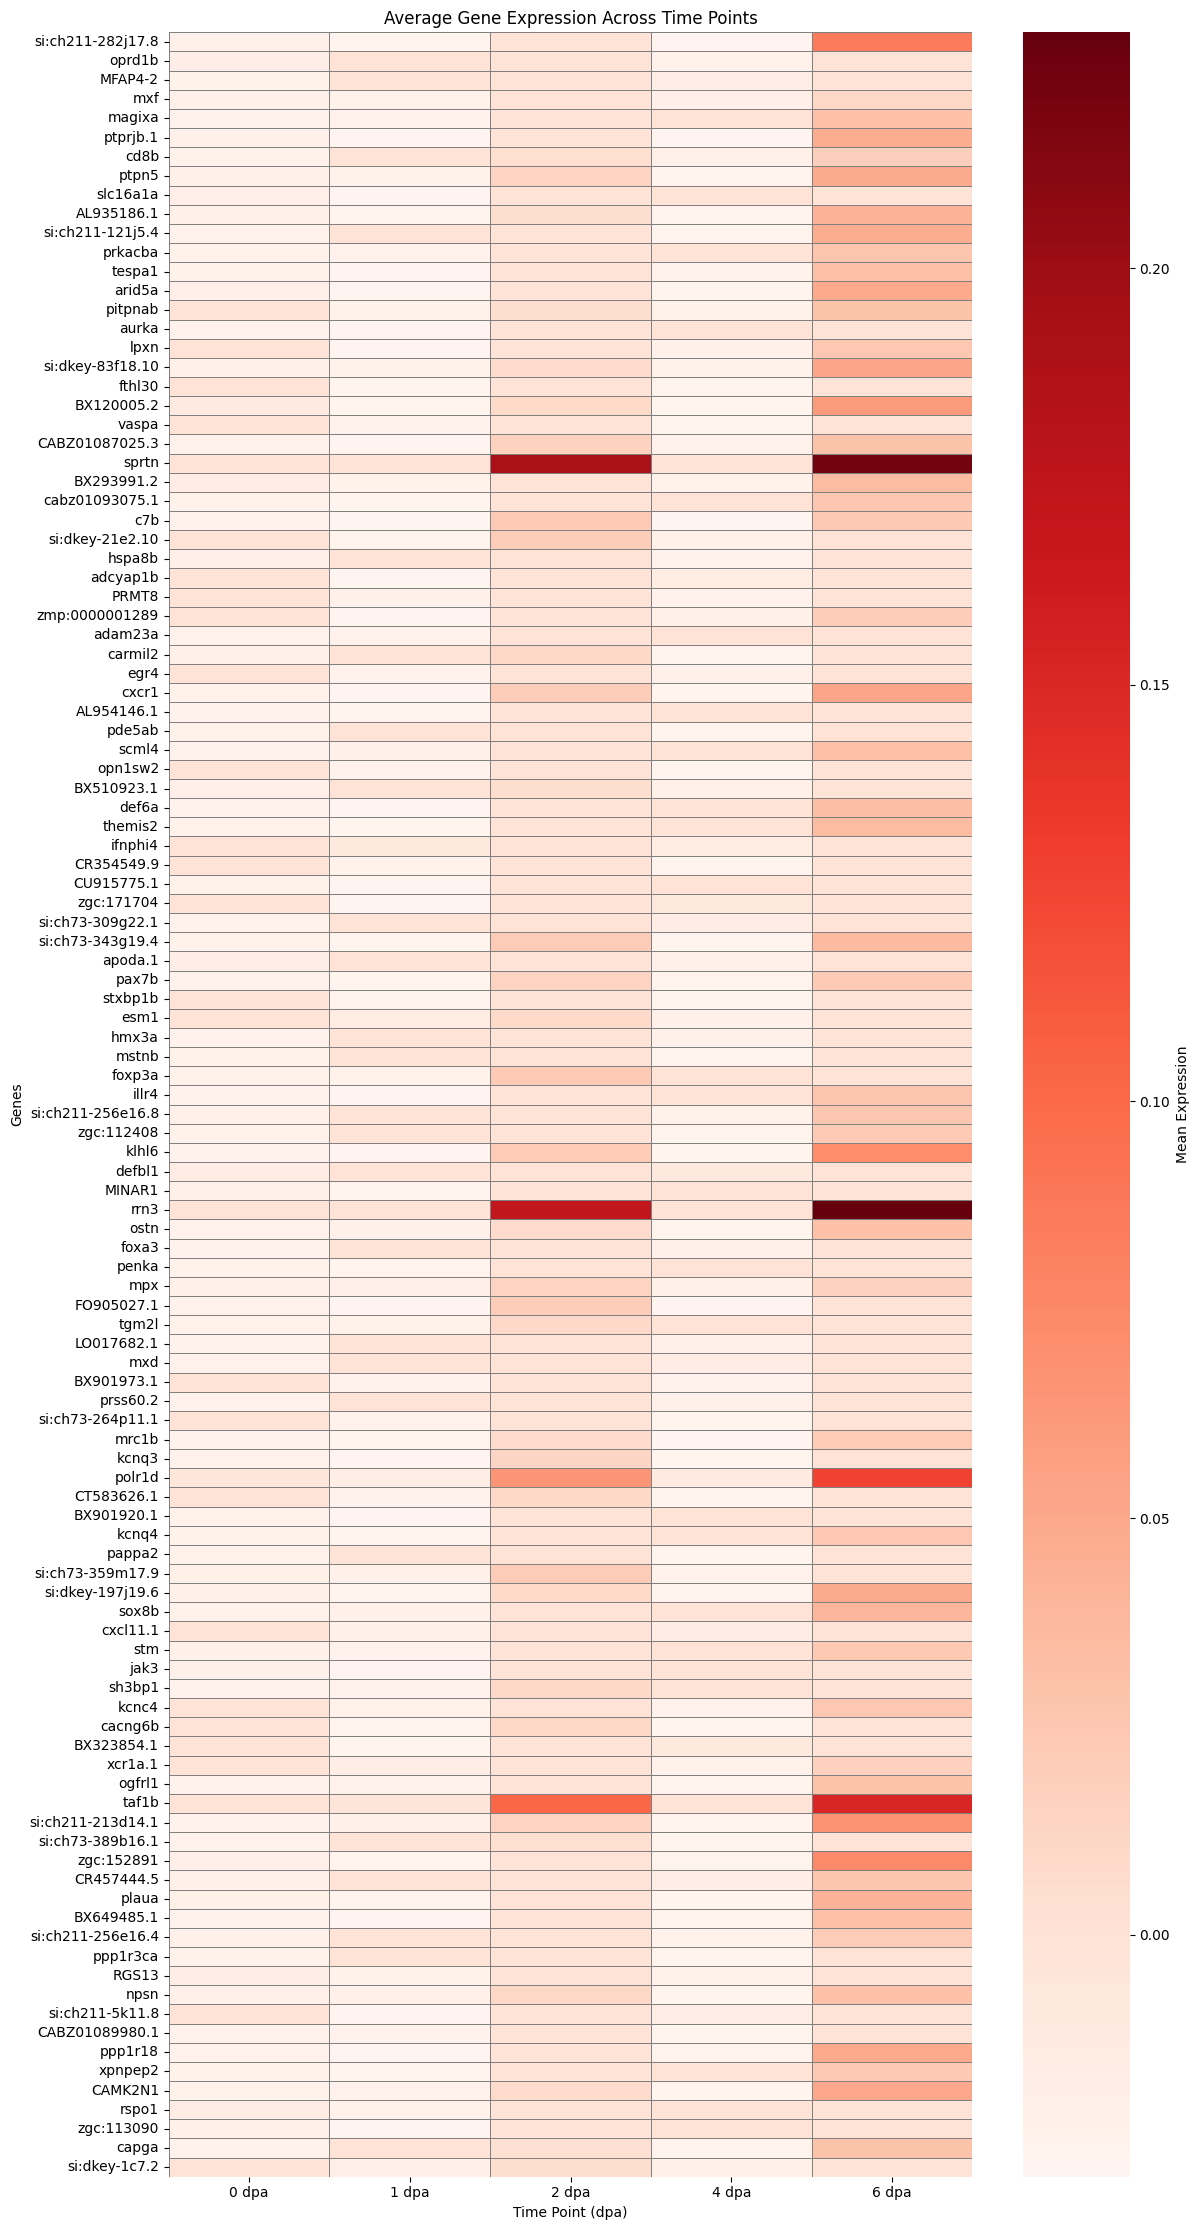

✅ Heatmap saved to:
- figures/average_gene_expression_heatmap.png
- figures/average_gene_expression_heatmap.pdf (optional for vector graphics)


In [3]:
# =============================================
# 🎯 Heatmap: Averaged Expression Per Time Point (Clean Version)
# =============================================

import scanpy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
adata = sc.read("merged_regeneration_data_clustered_deg.h5ad")

# Select genes
genes_of_interest = ['taf1b', 'rrn3', 'polr1d', 'sprtn']
result = adata.uns['rank_genes_groups']
top_degs = set()
for group in result['names'].dtype.names:
    top_degs.update(result['names'][group][:25])
top_degs = list(top_degs)
selected_genes = list(set(genes_of_interest + top_degs))

# ✅ Calculate mean expression per time point
mean_expr = pd.DataFrame()
for tp in adata.obs['time_point_label'].unique():
    subset = adata[adata.obs['time_point_label'] == tp]
    mean_expr[tp] = subset[:, selected_genes].X.mean(axis=0).A1  # .A1 converts sparse to dense array

mean_expr.index = selected_genes
mean_expr = mean_expr.T  # Flip: rows=time points, cols=genes

# ✅ Plot heatmap with seaborn
plt.figure(figsize=(12, max(6, len(selected_genes) * 0.2)))
sns.heatmap(
    mean_expr.T,  # Genes on Y-axis
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Mean Expression'},
)

plt.xlabel("Time Point (dpa)")
plt.ylabel("Genes")
plt.title("Average Gene Expression Across Time Points")
plt.tight_layout()
plt.show()

# ✅ Save Heatmap Image (for GitHub & Publications)
import os

# Create 'figures' directory if it doesn't exist
os.makedirs("figures", exist_ok=True)

# Save the figure (high DPI, suitable for GitHub and papers)
fig_path_png = "figures/average_gene_expression_heatmap.png"
fig_path_pdf = "figures/average_gene_expression_heatmap.pdf"

plt.figure(figsize=(12, max(6, len(selected_genes) * 0.2)))
sns.heatmap(
    mean_expr.T,
    cmap="Reds",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Mean Expression'},
)
plt.xlabel("Time Point (dpa)")
plt.ylabel("Genes")
plt.title("Average Gene Expression Across Time Points")
plt.tight_layout()

# Save
plt.savefig(fig_path_png, dpi=300, bbox_inches='tight')
plt.savefig(fig_path_pdf, dpi=300, bbox_inches='tight')
plt.close()

print(f"✅ Heatmap saved to:\n- {fig_path_png}\n- {fig_path_pdf} (optional for vector graphics)")
